In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import os

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from skimage import transform
from skimage import exposure
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [0]:
print(tf.__version__)

2.0.0


In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 73.7MB/s 
     |████████████████████████████████| 3.8MB 46.8MB/s 
     |████████████████████████████████| 81kB 13.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

In [0]:
	def build(width, height, depth, classes):
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		#1st Conv Layer
		model.add(Conv2D(16, (5, 5), padding="same", input_shape=inputShape)) 
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		#2nd Conv Layer
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		#3rd Conv Layer
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		
		#4th Conv Layer
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		#1st Fully Connected Layer
		model.add(Flatten())
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
	
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		model.summary()
		# return the constructed network architecture
		return model

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Code for training the data starts here

In [0]:
EPOCHS = 25
learning=0.001
batch_sz=64

In [0]:
#########
#to check how labelss are stored
sign_file=open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/signnames.csv")
labels=sign_file.read().strip().split("\n")[1:]
labels1=[]
for l in labels:
  labels1.append(l.split(",")[1])
#print(labels1)

In [0]:
import pickle 
#X=pickle.load(open("drive/My Drive/Colab Notebooks/Belgium Dataset/trainxpickle1.p","rb"))
#Y=pickle.load(open("drive/My Drive/Colab Notebooks/Belgium Dataset/trainypickle1.p","rb"))
X=pickle.load(open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/trainxpickle.p","rb"))
Y=pickle.load(open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/trainypickle.p","rb"))

In [0]:
TrainX, ValX, TrainY, ValY=train_test_split(X, Y, test_size=0.20, random_state=35)

In [0]:
#TestX=pickle.load(open("drive/My Drive/Colab Notebooks/Belgium Dataset/testxpickle1.p","rb"))
#TestY=pickle.load(open("drive/My Drive/Colab Notebooks/Belgium Dataset/testpickle1.p","rb"))
TestX=pickle.load(open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/testxpickle.p","rb"))
TestY=pickle.load(open("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/testypickle.p","rb"))


In [0]:
TrainX = TrainX.astype("float32") / 255.0
ValX = ValX.astype("float32") / 255.0
TestX=TestX.astype("float32")/255.0
print(TrainX.shape)

(31367, 32, 32, 3)


In [0]:
total_classes = len(np.unique(TrainY))
print(total_classes)
TrainY = to_categorical(TrainY, total_classes)
ValY = to_categorical(ValY, total_classes)
TestY=to_categorical(TestY, total_classes)
#print(TrainY)

43


In [0]:
classTotals = TrainY.sum(axis=0)
#print(classTotals)
#print(classTotals.max())
classWeight = classTotals.max() / classTotals
#print(classWeight)

In [0]:
aug = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.15,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=False,
	vertical_flip=False,
	fill_mode="nearest")


In [0]:
print("[INFO] compiling model...")
opt = Adam(lr=learning)

[INFO] compiling model...


In [0]:
model = build(width=32, height=32, depth=3,classes=total_classes)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)       

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [0]:
print("[INFO] training network...")
from timeit import default_timer as timer
start=timer()
H = model.fit_generator(
	aug.flow(TrainX, TrainY, batch_size=batch_sz),
	validation_data=(ValX, ValY),
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1)
end=timer()
print("Model trained in : ",(end-start)," seconds")

[INFO] training network...
Epoch 1/25
491/491 [==============================] - 43s 88ms/step - loss: 1.6812 - accuracy: 0.5320 - val_loss: 3.4597 - val_accuracy: 0.1664
Epoch 2/25
491/491 [==============================] - 42s 86ms/step - loss: 0.5432 - accuracy: 0.8339 - val_loss: 0.2291 - val_accuracy: 0.9346
Epoch 3/25
491/491 [==============================] - 42s 86ms/step - loss: 0.2944 - accuracy: 0.9118 - val_loss: 0.2281 - val_accuracy: 0.9272
Epoch 4/25
491/491 [==============================] - 42s 86ms/step - loss: 0.2177 - accuracy: 0.9341 - val_loss: 0.2582 - val_accuracy: 0.9160
Epoch 5/25
491/491 [==============================] - 42s 86ms/step - loss: 0.1669 - accuracy: 0.9481 - val_loss: 0.1183 - val_accuracy: 0.9619
Epoch 6/25
491/491 [==============================] - 42s 86ms/step - loss: 0.1380 - accuracy: 0.9586 - val_loss: 0.1976 - val_accuracy: 0.9348
Epoch 7/25
491/491 [==============================] - 43s 87ms/step - loss: 0.1214 - accuracy: 0.9615 - val_l

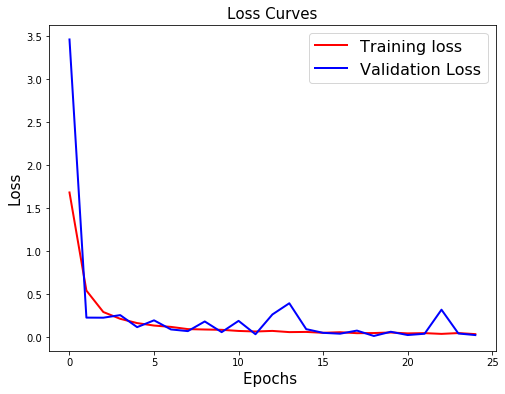

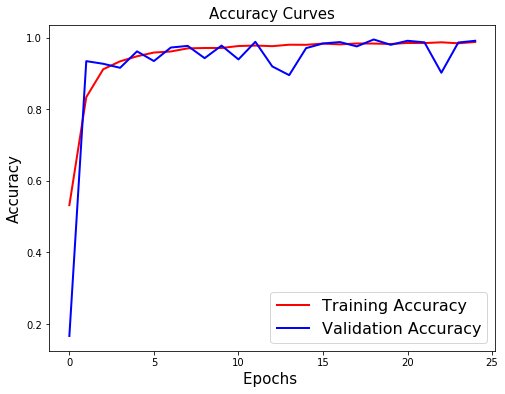

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(H.history['loss'],'r',linewidth=2.0)
plt.plot(H.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)
 
plt.savefig("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/Output/train_validation_loss_cnn.png")

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(H.history['accuracy'],'r',linewidth=2.0)
plt.plot(H.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.savefig("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/Output/train_validation_acc_cnn.png")

In [0]:
from tensorflow.keras.models import load_model
cnn_model=load_model("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/cnnmodel_v5_E25.model")

In [0]:
print(TestX.shape)
from timeit import default_timer as timer


(12630, 32, 32, 3)


In [0]:
print("[INFO] evaluating network...")
start=timer()
predictions = cnn_model.predict(TestX)
end=timer()
time=end-start
print("Model took {} seconds to test all images",time)
print(classification_report(TestY.argmax(axis=1),predictions.argmax(axis=1)))


[INFO] evaluating network...
Model took {} seconds to test all images 1.0621197990000155
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        60
           1       0.98      0.99      0.99       720
           2       0.89      0.99      0.94       750
           3       1.00      0.90      0.95       450
           4       1.00      0.95      0.97       660
           5       0.94      0.94      0.94       630
           6       0.98      0.81      0.89       150
           7       0.99      0.98      0.98       450
           8       0.98      0.96      0.97       450
           9       0.99      0.97      0.98       480
          10       1.00      0.98      0.99       660
          11       0.91      0.98      0.94       420
          12       1.00      0.98      0.99       690
          13       0.98      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       1.00      1.00      1.00   

In [0]:
from sklearn import metrics
print(metrics.accuracy_score(predictions.argmax(axis=1),TestY.argmax(axis=1)))

0.9654790182106097


In [0]:
model.save("drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/cnnmodel_v5_E25.model")
#model.save("drive/My Drive/Colab Notebooks/Belgium Dataset/cnnmodel_v1.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/gtsrb-german-traffic-sign/cnnmodel_v5_E25.model/assets
